In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

#define colors for piecharts for consistency
pie_colors = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]

csv_file_location = '/media/sf_working_dir/data_CSVs/*.csv' 

csv_files = glob.glob(csv_file_location)

csv_filter = [
    '/media/sf_working_dir/data_CSVs/yellow_tripdata_2023-01_clean.csv',
    #'/media/sf_working_dir/data_CSVs/yellow_tripdata_2023-02_clean.csv'
]

csv_filter = [file for file in csv_files if file in csv_filter]

DF_list = []
for file in csv_filter:
    df = pd.read_csv(file)
    num_lines = len(df)
    print(f"Reading {file}. Number of lines: {num_lines}")
    
    #Append DataFrame to the list
    DF_list.append(df)

#Concatenate all DataFrames
df = pd.concat(DF_list, ignore_index=True)

Reading /media/sf_working_dir/data_CSVs/yellow_tripdata_2023-01_clean.csv. Number of lines: 2995023


In [8]:
#calculate total fare amount
total_fair_amount = df['fare_amount'].sum()
formatted_total_fare_amount = "${:,.2f}".format(total_fair_amount)
print("\nTotal fare amount:", formatted_total_fare_amount)

#Calculate average fare amount
avg_fare_amount = df['fare_amount'].mean()
formatted_avg_fare_amount = "${:,.2f}".format(avg_fare_amount)
print("\nAverage fare amount:", formatted_avg_fare_amount)

#Calculate average trip distance
avg_trip_length = df['trip_distance'].mean()
print("\nAverage trip distance:", round(avg_trip_length,2),"Miles")

#Calculate count of rows (can be based on any column as is simply a count)
total_trips= df['VendorID'].count()
formatted_total_trips = "{:,}".format(total_trips)
print("\nTotal rides:", formatted_total_trips)


Total fare amount: $54,833,697.04

Average fare amount: $18.31

Average fare amount: 3.44 Miles

Total rides: 2,995,023


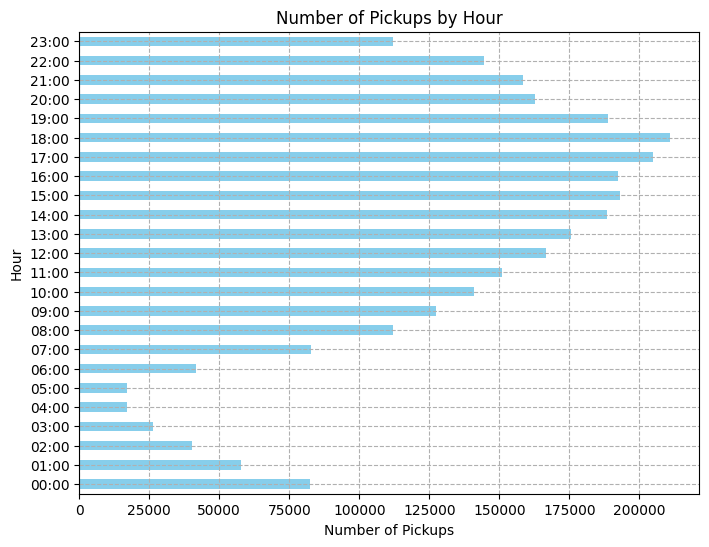

In [4]:
#Convert pickup datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

#Extract hour component from pickup datetime and format it with ':00'
df['pickup_hour'] = df['pickup_datetime'].dt.hour.apply(lambda x: f"{x:02d}:00")

#Count pickups by hour
pickup_amount = df['pickup_hour'].value_counts().sort_index()

#Plotting
plt.figure(figsize=(8, 6))
pickup_amount.plot(kind='barh', color='skyblue')
plt.title('Number of Pickups by Hour')
plt.xlabel('Number of Pickups')
plt.ylabel('Hour')
plt.grid(linestyle='--')
plt.show()


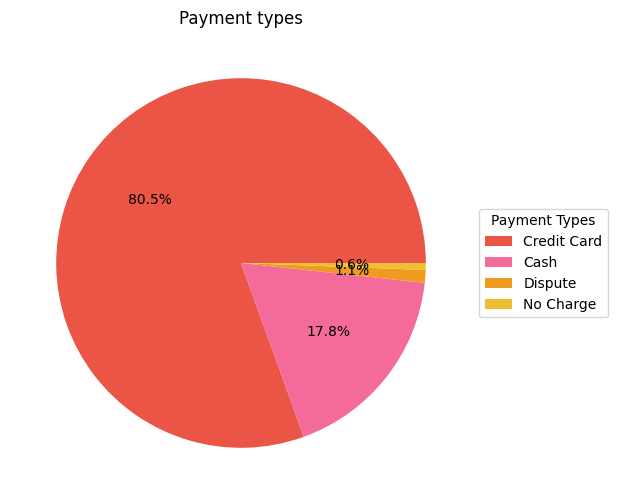

In [7]:
#Mapping numerical values to corresponding categories
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Voided"
}

#Replace numerical values with corresponding categories
df['payment_type'] = df['payment_type'].replace(payment_type_mapping)

#Count occurrences of each payment type
payment_type_count = df['payment_type'].value_counts()

#Plotting
plt.figure(figsize=(8, 6))
payment_type_count.plot(kind='pie', autopct='%1.1f%%', colors= pie_colors, labels=None)

#Adding legend with percentages
plt.legend(payment_type_count.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title='Payment Types')
plt.title("Payment types")
plt.ylabel('')
plt.show()

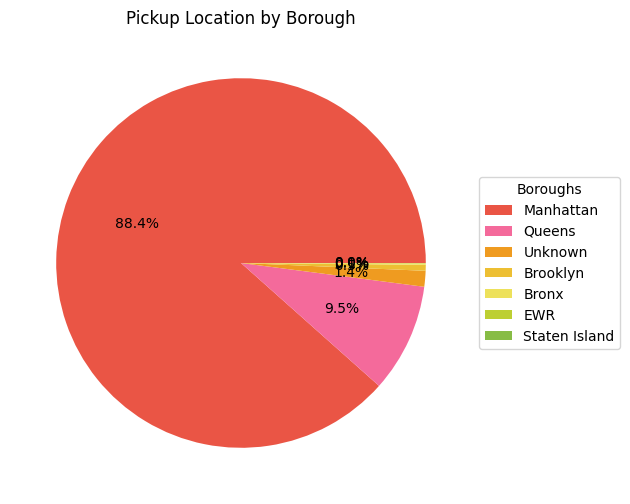

In [5]:
#Map taxi+_zone_lookup.csv, PULocationID, and DOLocationID
location_mapping = pd.read_csv('/media/sf_working_dir/taxi+_zone_lookup.csv')

#Merge the datasets
pickup_merged = df.merge(location_mapping, left_on='PULocationID', right_on='LocationID', how='left')

#Count occurrences of each Pickup Location ID mapped to Borough
pickup_count = pickup_merged['Borough'].value_counts()

#Plotting
plt.figure(figsize=(8, 6))
pickup_count.plot(kind='pie', autopct='%1.1f%%', colors=pie_colors, labels=None)

#Adding legend with percentages
plt.legend(pickup_count.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title='Boroughs')
plt.title('Pickup Location by Borough')
plt.ylabel('')
plt.show()

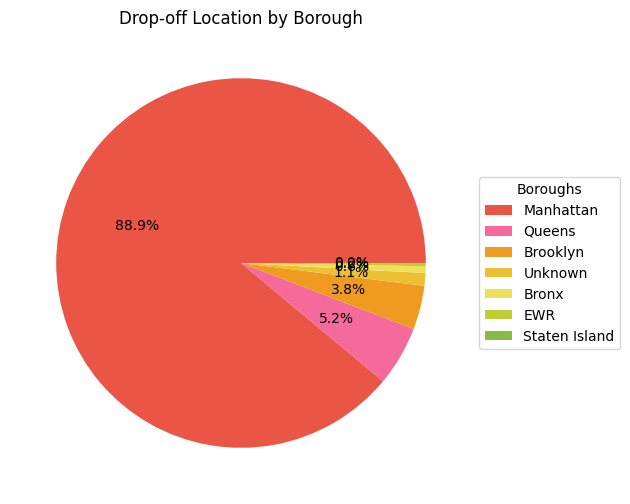

In [6]:
#Merge the datasets
dropoff_merged = df.merge(location_mapping, left_on='DOLocationID', right_on='LocationID', how='left')

#Count occurrences of each Drop-off Location ID mapped to Borough
dropoff_count = dropoff_merged['Borough'].value_counts()

#Plotting
plt.figure(figsize=(8, 6))
dropoff_count.plot(kind='pie', autopct='%1.1f%%', colors=pie_colors, labels=None)

#Adding legend
plt.legend(dropoff_count.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title='Boroughs')
plt.title('Drop-off Location by Borough')
plt.ylabel('')
plt.show()
